## Naive Bayes Classifier
### Sklearn's Naive Bayes Family

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.metrics import recall_score,f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

## GaussianNB

In [9]:
df = pd.read_csv("datasets/breast_cancer.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
df.shape

(569, 31)

In [11]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

### EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='mean radius', ylabel='Count'>

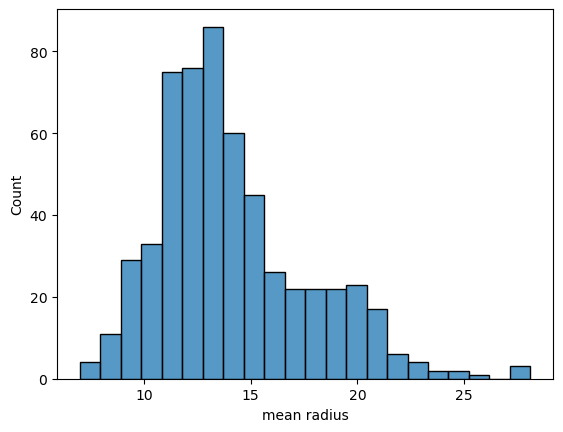

In [15]:
sns.histplot(data=df, x='mean radius')

<Axes: xlabel='mean radius'>

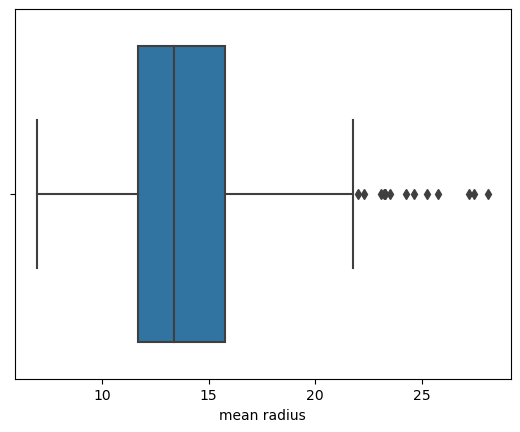

In [16]:
sns.boxplot(data=df, x='mean radius')

### Train Test Split 

In [18]:
X = df.drop("target", axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54, shuffle=True)
X_train.shape, X_test.shape

((455, 30), (114, 30))

### Model Instance

In [19]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [20]:
model.predict_proba(X_test)

array([[4.75366860e-013, 1.00000000e+000],
       [1.17712955e-014, 1.00000000e+000],
       [1.00000000e+000, 6.07499796e-044],
       [9.13971339e-019, 1.00000000e+000],
       [1.00000000e+000, 4.60817859e-019],
       [1.00000000e+000, 3.44972241e-111],
       [1.24319105e-014, 1.00000000e+000],
       [1.08467010e-015, 1.00000000e+000],
       [2.94861375e-013, 1.00000000e+000],
       [1.89227467e-015, 1.00000000e+000],
       [4.75927241e-014, 1.00000000e+000],
       [1.00000000e+000, 5.80899188e-032],
       [2.17427248e-011, 1.00000000e+000],
       [7.59275905e-010, 9.99999999e-001],
       [1.00000000e+000, 5.35588875e-221],
       [1.00000000e+000, 1.25759142e-241],
       [1.96455863e-013, 1.00000000e+000],
       [7.39066555e-013, 1.00000000e+000],
       [2.71601737e-012, 1.00000000e+000],
       [1.02557573e-007, 9.99999897e-001],
       [8.91964054e-018, 1.00000000e+000],
       [2.32845040e-010, 1.00000000e+000],
       [1.37378165e-013, 1.00000000e+000],
       [2.0

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.])

In [23]:
y_test

278    1.0
170    1.0
517    0.0
561    1.0
167    0.0
      ... 
379    0.0
287    1.0
562    0.0
443    1.0
155    1.0
Name: target, Length: 114, dtype: float64

### Evaluation

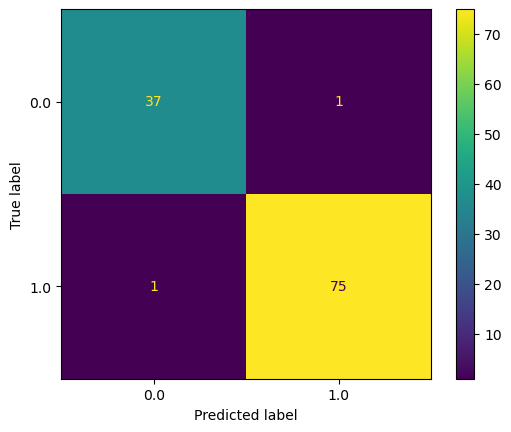

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [25]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy :", acc)
print("Precision :", pre)
print("Recall :", recall)
print("F1-Score :", f1)
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy : 0.9824561403508771
Precision : 0.9868421052631579
Recall : 0.9868421052631579
F1-Score : 0.9868421052631579
Classification Report :
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        38
         1.0       0.99      0.99      0.99        76

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## MultinomialNB

In [2]:
data = pd.read_csv("datasets/text-data.csv")
data

,document,label
0,Arif youTube lectures are amaizing,positive
1,This is an amaizing place,positive
2,I do not like this restaurant,negative
3,Arif youTube lectures are great,positive
4,"I cannot deal with this, you deal with this",negative
5,This is my best work,positive
6,What an awesome view,positive
7,I am tired of this stuff,negative
8,He is my sworn enemy,negative
9,My boss is horrible,negative


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  18 non-null     object
 1   label     18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


In [4]:
data.shape

(18, 2)

In [5]:
le = LabelEncoder()
data['numericLabel']= le.fit_transform(data.iloc[:,-1])
data

,document,label,numericLabel
0,Arif youTube lectures are amaizing,positive,1
1,This is an amaizing place,positive,1
2,I do not like this restaurant,negative,0
3,Arif youTube lectures are great,positive,1
4,"I cannot deal with this, you deal with this",negative,0
5,This is my best work,positive,1
6,What an awesome view,positive,1
7,I am tired of this stuff,negative,0
8,He is my sworn enemy,negative,0
9,My boss is horrible,negative,0


In [6]:
X = data.document
X

0              Arif youTube lectures are amaizing
1                       This is an amaizing place
2                   I do not like this restaurant
3                 Arif youTube lectures are great
4     I cannot deal with this, you deal with this
5                            This is my best work
6                            What an awesome view
7                        I am tired of this stuff
8                            He is my sworn enemy
9                             My boss is horrible
10                       This is an awesome place
11          I do not like the taste of this juice
12                            I love to do hiking
13              I am sick and tired of this place
14                           What a great holiday
15                 That is a bad locality to stay
16                 We will have good fun tomorrow
17                 I went to my enemy house today
Name: document, dtype: object

In [7]:
y = data.numericLabel
y

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
Name: numericLabel, dtype: int32

In [9]:
cv = CountVectorizer()
bow = cv.fit_transform(X)
bow

<18x55 sparse matrix of type '<class 'numpy.int64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [10]:
bow.todense()

matrix([[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1,

In [11]:
dtm = pd.DataFrame(data=bow.todense(), columns=cv.get_feature_names_out())
dtm

,am,amaizing,an,and,are,arif,awesome,bad,best,boss,...,tomorrow,view,we,went,what,will,with,work,you,youtube
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_Train, X_Test, y_Train, y_Test = train_test_split(bow.toarray(), y, test_size=0.2, random_state=54, shuffle=True)
X_train.shape, X_test.shape

((14, 55), (4, 55))

In [15]:
mm =MultinomialNB()
mm.fit(X_Train, y_Train)

MultinomialNB()

In [16]:
my_pred = mm.predict(X_Test)
my_pred

array([1, 0, 0, 1])

In [17]:
y_Test

3     1
12    1
17    0
10    1
Name: numericLabel, dtype: int32

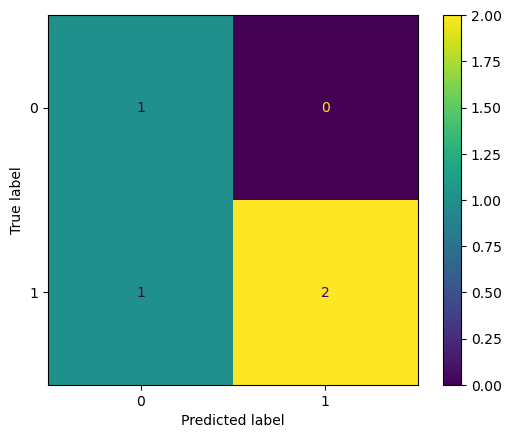

In [18]:
ConfusionMatrixDisplay.from_predictions(y_Test, my_pred)

In [19]:
acc = accuracy_score(y_Test, my_pred)
pre = precision_score(y_Test, my_pred)
recall = recall_score(y_Test, my_pred)
f1 = f1_score(y_Test, my_pred)
print("Accuracy :", acc)
print("Precision :", pre)
print("Recall :", recall)
print("F1-Score :", f1)
print("Classification Report :\n", classification_report(y_Test, my_pred))

Accuracy : 0.75
Precision : 1.0
Recall : 0.6666666666666666
F1-Score : 0.8
Classification Report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [20]:
new = ['youtube lectures are great source of learning']
new_vec = cv.transform(new)
new_vec

<1x55 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [21]:
y_hat = mm.predict(new_vec)
y_hat

array([1])

In [22]:
new = ['i am sick and do not want to stay in this house']
new_vec = cv.transform(new)
y_hat = mm.predict(new_vec)
y_hat

array([0])